In [11]:
'''

Use this to learn pandas and machine learning.

Based on 
https://www.kaggle.com/omarelgabry/rossmann-store-sales/a-journey-through-rossmann-stores

Things I've learned:

- Manipulate a column of a dataframe
-- comparision
-- cast
-- apply lambda function

- group by

- Use sns to draw charts

'''

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.linear_model import LinearRegression

In [3]:
rossmann_df  = pd.read_csv("input/train.csv")
store_df     = pd.read_csv("input/store.csv")
test_df      = pd.read_csv("input/test.csv")

C:\Users\rvlfl_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
display(rossmann_df.head())

rossmann_df.info()
print("----------------------------")
store_df.info()
print("----------------------------")
test_df.info()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-n

## Explore Each Feature

### Open

So the result shows that in most cases, the shops are closed on Sunday.

C:\Users\rvlfl_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Series([], Name: Open, dtype: float64)

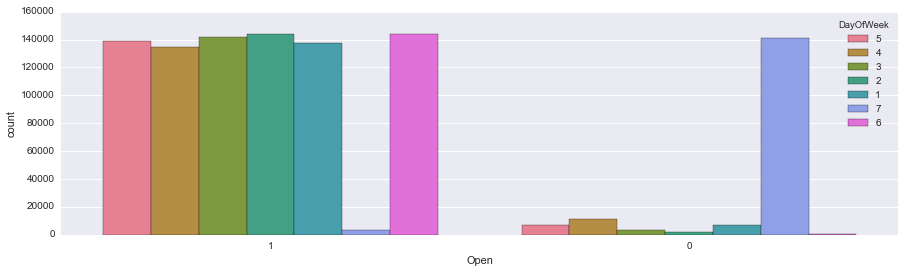

In [27]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=rossmann_df, palette="husl", ax=axis1)

# fill NaN values in test_df with Open=1 if DayOfWeek != 7
test_df["Open"][test_df["Open"] != test_df["Open"]] = (test_df["DayOfWeek"] != 7).astype(int)

# It seems that this code does not have an effect.

# How to understand the above code?
# The equivalent could be:
# s = test_df["Open"][np.isnan(test_df["Open"])]

# Similarly:
#s = test_df["DayOfWeek"] != 7
#s[s == False]

### Monthly Sales and Customers


Observations:

- At the monthly level, the sales number seems to have periodicity. Can the machine learning model capture it?

- The sales trend and customer trend are highly correlated.

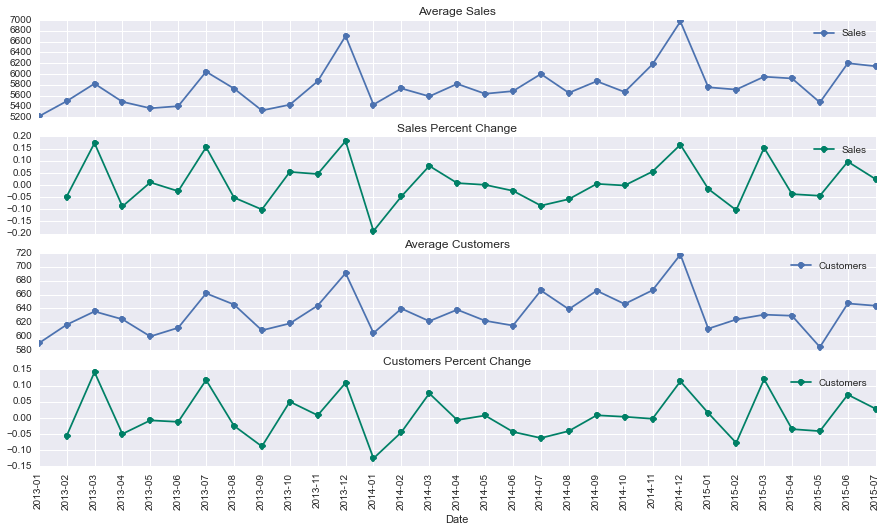

In [40]:


# Create Year and Month columns
rossmann_df['Year']  = rossmann_df['Date'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Date'].apply(lambda x: (str(x)[:7]))

fig, axes = plt.subplots(4,1,sharex=True,figsize=(15,8))

i = 0

for feature in ["Sales", "Customers"]:

    # group by date and get average sales, and precent change
    average    = rossmann_df.groupby('Date')[feature].mean()
    pct_change = rossmann_df.groupby('Date')[feature].sum().pct_change()

    

    # plot average sales over time(year-month)
    axes[i] = average.plot(legend=True, ax=axes[i], marker='o', title="Average " + feature)
    axes[i].set_xticks(range(len(average)))
    axes[i].set_xticklabels(average.index.tolist(), rotation=90)
    i += 1
    
    # plot precent change for sales over time(year-month)
    axes[i] = pct_change.plot(legend=True, ax=axes[i], marker='o', rot=90,
                          colormap="summer", title=feature + " Percent Change")
    # ax2.set_xticks(range(len(pct_change_sales)))
    # ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)
    i += 1


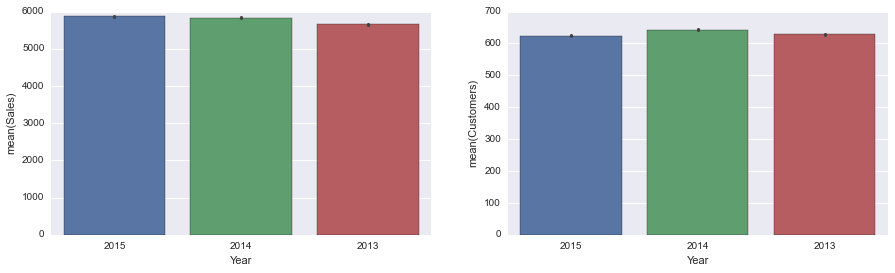

In [36]:
# .... contiune with Date

# Plot average sales & customers for every year
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=rossmann_df, ax=axis2)

# Drop Date column
# rossmann_df.drop(['Date'], axis=1,inplace=True)
# test_df.drop(['Date'], axis=1,inplace=True)

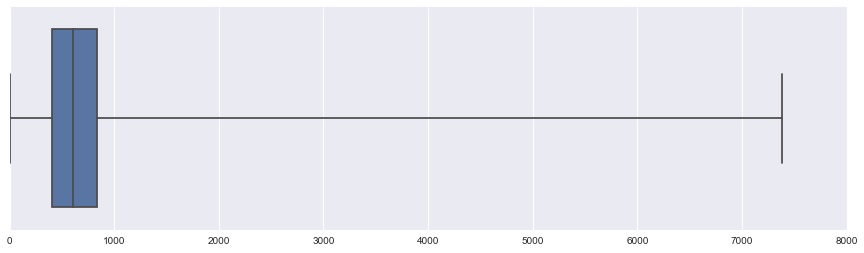

In [43]:

# Customers

fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)

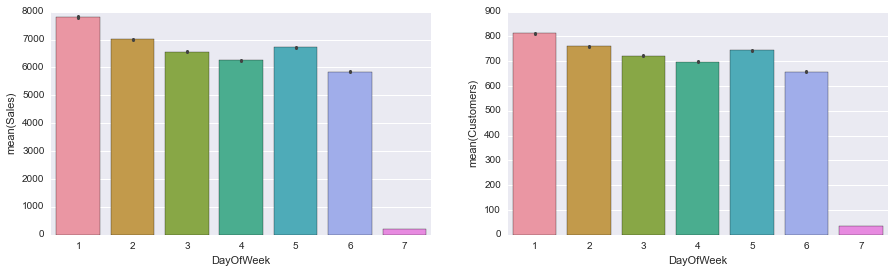

In [44]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis2)

### Time Series Linear Regression

In [45]:
# Get the sales column for each store


runLinearRegression = True
runTimeSeriesLinearRegression = False

# TODO: understand this
rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))

#print(test_dic)

for i in test_dic:

    store = rossmann_dic[i]
    
    
    # I guess here, axis=1 refers to columns
    X_train = store.drop(["Sales","Store"], axis =1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Time Series - Linear Regression
    
    if runTimeSeriesLinearRegression:
        _X_train = []
        _X_test = []
        
        # TODO: We can probably get rid of these for loops by shifting the list and then build a
        # new dataframe as the X_train
        
        Y_list = list(Y_train)
        for i in range(0, len(Y_list) - 7):
            row = []
            for j in range(i + 1, i + 8):
                row.append(Y_list[j])
            _X_train.append(row)
        lreg = LinearRegression()
        lreg.fit(_X_train, Y_list[0:len(Y_list) - 7])

        #print(lreg.intercept_)
        #break

        pred_Y = []

        for i in range(0, len(X_test.index)):
            pred = 0
            for j in range(i - 7, i):
                v = None
                coef = lreg.coef_[j - i + 7]
                if j < 0:
                    pred += Y_list[abs(j) - 1] * coef
                else:
                    pred += pred_Y[j] * lreg.coef_[0] * coef
            pred += lreg.intercept_
            pred_Y.append(pred)
        print(pred_Y)
        break

    # Linear Regression
    
    if runLinearRegression:
        lreg = LinearRegression()
        lreg.fit(X_train, Y_train)
        Y_pred = lreg.predict(X_test)
        scores.append(lreg.score(X_train, Y_train))
        
# Build a regression

ValueError: could not convert string to float: 'a'